<a href="https://www.kaggle.com/code/muhammadasifwazir/cv-assignment-01?scriptVersionId=198630548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

# **SOLUTION: SO LET'S START**

# Fashion MNIST Image Classifier using Convolutional Neural Networks (CNN)

This notebook builds a CNN-based image classifier to classify images from the Fashion MNIST dataset.
The dataset consists of 60,000 training images and 10,000 testing images, each being a 28x28 grayscale image
of clothing items from 10 categories, including t-shirts, trousers, dresses, etc.

### The steps include:
1. Loading and preprocessing the dataset (normalization).
2. Visualizing some images from the dataset.
3. Building a CNN model.
4. Training the model on the training data.
5. Evaluating the model on the test data.

### Libraries Used:
- TensorFlow: for building and training the deep learning model.
- Matplotlib: for visualizing the dataset.

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

- **Purpose of Data Visualization:** 
Discuss why it’s important to visualize the data before training the model. It helps ensure that the data was loaded and processed correctly.

- **Gray Scale Images:**
Mention how Fashion MNIST images are 28x28 grayscale images, and the pixel values range from 0 (black) to 255 (white) before normalization.

- **Potential for Overfitting:** 
When inspecting the data, emphasize that visual inspection also helps identify potential issues such as class imbalance or ambiguity in labels that could lead to overfitting or poor generalization.

In [3]:
image_index = 0  # You can change this index to view different images
image = x_train[image_index].reshape(28, 28)  # Reshape to 28x28 for plotting

In [4]:
# Get the corresponding label for the chosen image
label = y_train[image_index]

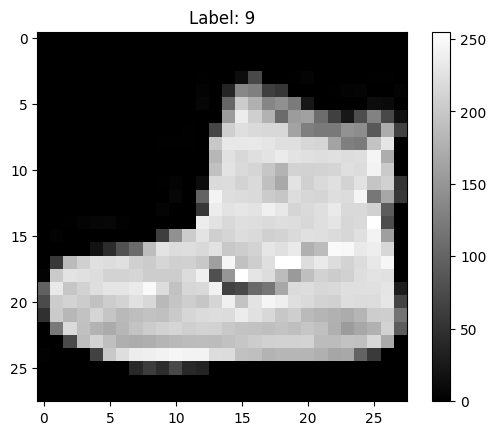

In [5]:
# Plot the image using matplotlib
plt.imshow(image, cmap='gray')  # Display in grayscale
plt.title(f"Label: {label}")  # Display the label as the title
plt.colorbar()  # Show a colorbar indicating the grayscale intensity
plt.grid(False)  # Remove grid for better clarity
plt.show()

## Convert grayscale to RGB
- **Artificial RGB Representation:** 
Since the dataset is grayscale, converting to RGB in this manner doesn’t add color information but only replicates the intensity across three channels.

- **Purpose of RGB Conversion:** 
The model or application requires input in RGB format (for example, if we later want to use pre-trained models like ResNet that expect 3-channel inputs), this method is a simple way to convert grayscale to RGB.

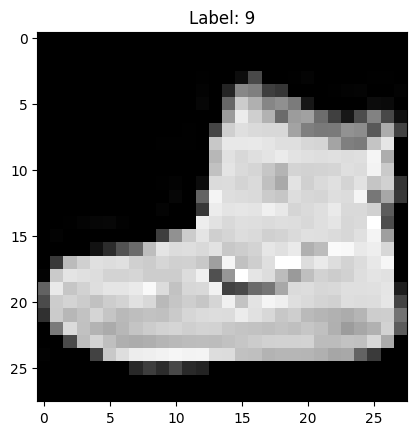

In [6]:
# Convert grayscale to RGB by stacking the grayscale image along the color channels
rgb_image = np.stack((image,)*3, axis=-1)

# Display the RGB image
plt.imshow(rgb_image)  # Display as an RGB image (even though it still has grayscale information)
plt.title(f"Label: {y_train[image_index]}")
plt.grid(False)
plt.show()

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

- **Why we do Normalization:** 
To reduces the range of input values, making **optimization easier during the training** process. It also prevents large input values from disproportionately influencing the loss or gradient updates during training.

**Model Stability:** 
Explain that neural networks typically perform better when 
**input data is normalized, leading to faster convergence and better generalization.**

In [7]:
# Normalize pixel values (0 to 255) to a range of 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

1.0 0.0
1.0 0.0


In [9]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

- **Why do we add a 4th Dimension?:** 
Convolutional neural networks (CNNs) expect input images to have 3D structure (height, width, and channels). Since Fashion MNIST images are grayscale, the additional dimension represents a single color channel.

**Difference with RGB:** 
In RGB images, this 4th dimension would be 3 to account for the Red, Green, and Blue channels, but here it’s set to 1 for grayscale.

**Importance for CNN:** 

**This reshaping is necessary for compatibility with the Keras Conv2D layer, which expects a 4D input structure.**

In [10]:
# Reshape the X arrays to add a single channel dimension (for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# To Check the new shape
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

- **Why do we use One-Hot Encoding?:** 
The Neural networks perform better with one-hot encoded labels in classification tasks because it **transforms the labels into a format suitable for categorical crossentropy loss**, which is commonly used for multi-class classification.

**Multi-Class Classification:** where the model is expected to assign probabilities to each of the 10 classes, and the one-hot encoding format helps in calculating the loss for each output.

In [11]:
from keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Printing the shape of y_train and a sample
print(f"New shape of y_train: {y_train.shape}")
print(f"New shape of y_test: {y_test.shape}")
print(f"Sample one-hot encoded label for y_train[0]: {y_train[0]}")


New shape of y_train: (60000, 10)
New shape of y_test: (10000, 10)
Sample one-hot encoded label for y_train[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

## **Explaination of the Network**

1. **Conv2D Layer:** 
This layer applies 32 filters of size (4x4) over the input image to extract features. The input_shape=(28, 28, 1) is specified for the first layer, as it defines the input size (28x28 with 1 channel).
2. **MaxPooling2D Layer:** 
This layer downsamples the feature maps from the convolutional layer using a pool size of (2,2), which reduces spatial dimensions by half.
3. **Flatten Layer:** 
The 2D feature maps are flattened into a 1D vector to be passed into the fully connected layers.
4. **Dense Layer (128 units):** 
A fully connected layer with 128 neurons and ReLU activation, allowing the model to learn complex patterns.
5. **Final Dense Layer (10 units):** 
The output layer has 10 neurons (one for each class in Fashion MNIST) with softmax activation, which converts the outputs to probabilities summing up to 1.

**COMPILE**

- **Loss Function:** We use categorical_crossentropy for multi-class classification.

- **Optimizer:** rmsprop is used for optimizing the model weights.

- **Metrics:** The model will track accuracy as a performance metric.

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add a 2D Convolutional layer with 32 filters and kernel size of (4,4)
model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))

# Add a Pooling layer with pool size of (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layers to a 1D vector
model.add(Flatten())

# Add a Dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the final Dense layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

To experiment with different model configurations, we'll modify the parameters of the CNN. This includes:

* Changing the number of filters: 
Instead of 32, we can try different values like 16, 64, or even more filters.
    
* Varying the kernel size: 
We can experiment with different kernel sizes, such as (3,3) or (5,5), to see how smaller or larger filters affect feature extraction.

* Varying the number of neurons in the Dense layer: 
Instead of 128 neurons, we could try more or fewer neurons (e.g., 64 or 256).

* Trying different activation functions: 
Instead of using ReLU, we can try tanh or LeakyReLU, which might help in different situations (e.g., vanishing gradient or activation saturation).

**Experiment 1: Changing the Number of Filters and Kernel Size**

In [13]:
from keras.layers import LeakyReLU

# Initialize the model
model_exp1 = Sequential()

# Experiment with 64 filters and a kernel size of (3,3)
model_exp1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a Pooling layer with pool size of (2,2)
model_exp1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layers to a 1D vector
model_exp1.add(Flatten())

# Experiment with a Dense layer of 256 neurons
model_exp1.add(Dense(256, activation='relu'))

# Add the final Dense layer with 10 neurons and softmax activation
model_exp1.add(Dense(10, activation='softmax'))

# Compile the model
model_exp1.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

# Summary of the experiment 1 model
model_exp1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,772,362 (10.58 MB)

 Trainable params: 2,772,362 (10.58 MB)

 Non-trainable params: 0 (0.00 B)

**Experiment 2: Using LeakyReLU as Activation Function and Fewer Neurons**

In [14]:
from keras.layers import LeakyReLU

# Initialize the model
model_exp2 = Sequential()

# Experiment with 32 filters and a kernel size of (3,3), using LeakyReLU activation
model_exp2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model_exp2.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation

# Add a Pooling layer with pool size of (2,2)
model_exp2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layers to a 1D vector
model_exp2.add(Flatten())

# Experiment with a Dense layer of 64 neurons
model_exp2.add(Dense(64))
model_exp2.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation

# Add the final Dense layer with 10 neurons and softmax activation
model_exp2.add(Dense(10, activation='softmax'))

# Compile the model
model_exp2.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

# Summary of the experiment 2 model
model_exp2.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

**Experiment 3: Using tanh as the Activation Function**

In [15]:
# Initialize the model
model_exp3 = Sequential()

# Experiment with 32 filters and kernel size of (5,5), using tanh activation
model_exp3.add(Conv2D(filters=32, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))

# Add a Pooling layer with pool size of (2,2)
model_exp3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layers to a 1D vector
model_exp3.add(Flatten())

# Experiment with a Dense layer of 128 neurons, using tanh activation
model_exp3.add(Dense(128, activation='tanh'))

# Add the final Dense layer with 10 neurons and softmax activation
model_exp3.add(Dense(10, activation='softmax'))

# Compile the model
model_exp3.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

# Summary of the experiment 3 model
model_exp3.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,074 (2.26 MB)

 Trainable params: 592,074 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [16]:
# Number of epochs
epochs = 15

# Fit the model on the training data
history = model_exp1.fit(x_train, y_train, 
                         epochs=epochs, 
                         batch_size=64,  # Can adjust batch size instead of 64 try 32, 128, etc
                         validation_split=0.2)  # Use 20% of the training data as validation


Epoch 1/15


I0000 00:00:1727518472.548523      69 service.cc:145] XLA service 0x7ab9b0003d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727518472.548573      69 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727518472.548576      69 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 61/750 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5588 - loss: 1.3201

I0000 00:00:1727518475.821921      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7850 - loss: 0.6164 - val_accuracy: 0.8856 - val_loss: 0.3194
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8960 - loss: 0.2947 - val_accuracy: 0.8988 - val_loss: 0.2788
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9118 - loss: 0.2411 - val_accuracy: 0.9036 - val_loss: 0.2651
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9234 - loss: 0.2030 - val_accuracy: 0.9111 - val_loss: 0.2470
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9368 - loss: 0.1718 - val_accuracy: 0.9035 - val_loss: 0.2784
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9444 - loss: 0.1531 - val_accuracy: 0.9103 - val_loss: 0.2622
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9502 - loss: 0.1335 - val_accuracy: 0.9061 - val_loss: 0.2805
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9575 - loss: 0.1177 - val_accuracy: 0.9153 - val_

## **Monitoring the Training Process**

**Overfitting:** 
If the training accuracy improves but the validation accuracy does not, or if the validation loss starts increasing, this indicates overfitting. You might need to:

    1. Add regularization (e.g., dropout).
    2. Reduce the complexity of the model.
    3. Use early stopping to prevent further training when validation performance no longer improves.

**Underfitting:**
If the training and validation accuracy are low, this suggests the model may not have enough capacity to learn the data properly. You could:

    1. Increase the number of epochs.
    2. Increase the model complexity (e.g., add more layers, increase the number of filters or neurons).

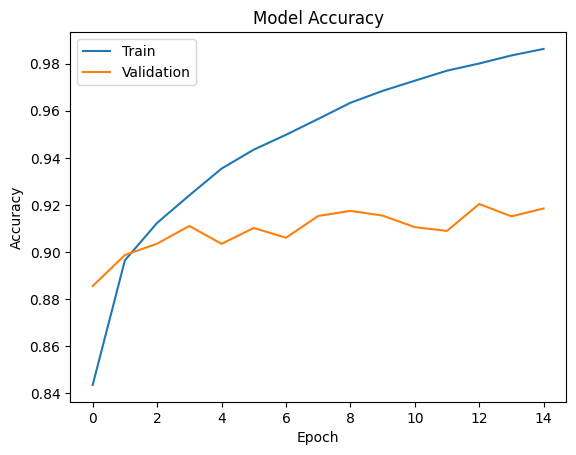

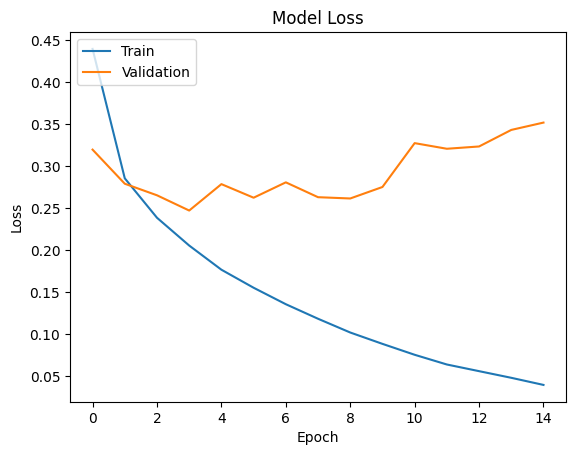

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **The model is Overfitting** 
Because the **training accuracy improves** but the **validation accuracy does not**, and the **validation loss starts increasing**, and training loss decreasing.**

## **Strategies to Reduce Overfitting:**

1. **Use Dropout:** 

Dropout is a regularization technique that randomly drops a fraction of neurons during training, which helps prevent the model from becoming too dependent on specific neurons and promotes generalization.

- The Dropout layers can be add to your model between the Dense layers.
### **Add Dropout layer before the final layer**
model.add(Dropout(0.5))  # Drop 50% of neurons

2. **Early Stopping:**

Early stopping is a technique that monitors the validation performance during training and **stops training if the performance stops improving**. This helps avoid overfitting when the model starts to learn the noise in the training data.

patience=3, restore_best_weights=True **(This ensures that the model reverts to the state where validation performance was at its best.)**

3. **Reduce Model Complexity:**

If the model is overfitting, it may be too complex (i.e., it has too many parameters relative to the size of the dataset). You can **reduce the number of filters** in the convolutional layers or **reduce the number of neurons** in the Dense layer.

4. **L2 Regularization (Weight Decay):**

L2 regularization applies a **penalty on large weights**, which helps prevent the model from overfitting by making it less sensitive to specific data points.

5. **Data Augmentaion:**

It is used for **improve the generalization of the model**, By the data augmentation to artificially expand the dataset by applying transformations like rotations, shifts, and flips to the training images.




### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

# Great Job!